In [3]:
import sys
sys.path.append('..')
import numpy as np
import pickle 
from produce_maps.tcrit import TCRIT, Tcrit_map, data_both_biomes
import matplotlib
import matplotlib.pyplot as plt
from utils import d_sl, years, dense_vegetation, sl_tropics, version, DATA_PATH
from sklearn.linear_model import LinearRegression

from matplotlib import colors
import matplotlib.ticker as mticker
import rasterio as rio
from scipy.stats import skew
from tqdm import tqdm
from matplotlib.colors import LinearSegmentedColormap
from matplotlib import colormaps
from produce_maps.tcrit import data_both_biomes

terra = rio.open(DATA_PATH + "/terraaqua.tif", 'r').read(1)
d_ext = {"South America": "south_america",  "Africa": "africa", "SE Asia": "south_east_asia"}
d_ext = {value: key for key, value in d_ext.items()}

# TSM 2020 using Tmax

In [5]:
mask = np.zeros_like(data_both_biomes).astype(float)
mask[:,:] = np.nan
for key, sl in d_sl.items():
    ext = key
        
    lr_outfile = DATA_PATH + f"/outputs/delta_Tmax_Tmodis{ext}_per_year_2001_2020_reversed{version}.npy"
    lr_map = - np.load(lr_outfile)[...,-1]
    lr_map[~data_both_biomes[sl]] = np.nan
    lr_map[~dense_vegetation[sl]] = np.nan
    mask[sl] = lr_map
final_map =  mask[sl_tropics]



def shiftedColorMap(cmap, start=0, midpoint=0.5, stop=1.0, name='shiftedcmap'):
    '''
    Function to offset the "center" of a colormap. Useful for
    data with a negative min and positive max and you want the
    middle of the colormap's dynamic range to be at zero.

    Input
    -----
      cmap : The matplotlib colormap to be altered
      start : Offset from lowest point in the colormap's range.
          Defaults to 0.0 (no lower offset). Should be between
          0.0 and `midpoint`.
      midpoint : The new center of the colormap. Defaults to 
          0.5 (no shift). Should be between 0.0 and 1.0. In
          general, this should be  1 - vmax / (vmax + abs(vmin))
          For example if your data range from -15.0 to +5.0 and
          you want the center of the colormap at 0.0, `midpoint`
          should be set to  1 - 5/(5 + 15)) or 0.75
      stop : Offset from highest point in the colormap's range.
          Defaults to 1.0 (no upper offset). Should be between
          `midpoint` and 1.0.
    '''
    cdict = {
        'red': [],
        'green': [],
        'blue': [],
        'alpha': []
    }

    # regular index to compute the colors
    reg_index = np.linspace(start, stop, 257)

    # shifted index to match the data
    shift_index = np.hstack([
        np.linspace(0.0, midpoint, 128, endpoint=False), 
        np.linspace(midpoint, 1.0, 129, endpoint=True)
    ])

    for ri, si in zip(reg_index, shift_index):
        r, g, b, a = cmap(ri)

        cdict['red'].append((si, r, r))
        cdict['green'].append((si, g, g))
        cdict['blue'].append((si, b, b))
        cdict['alpha'].append((si, a, a))

    newcmap = matplotlib.colors.LinearSegmentedColormap(name, cdict)
    # plt.register_cmap(cmap=newcmap)

    return newcmap


def make_fig_(data_species, figsize=(10,5), minn=0, maxx=0,sl=None, interpolation="none", title_fig=None, is_hansen=False, cmap_='brg',save_title=None):
    fig = plt.figure(figsize=figsize)
    ax = fig.gca()
    cmap_terra = colors.ListedColormap(['white', '#D7D7D7FF']) #'grey'])
    img = terra[sl].squeeze()
    ax.imshow(img, cmap=cmap_terra)
    cmap_species = cmap_
    # cmap_species.set_under('k', alpha=0)
    cmap_species.set_bad(alpha=0)
    d = data_species.squeeze().copy()
    im = ax.imshow(d, cmap=cmap_species, interpolation=interpolation) # , norm=colors.LogNorm()
    min_cbar = int(np.nanmin(d)) 
    max_species = int(np.nanmax(d))
    print(min_cbar, max_species)
    min_cbar = minn
    max_species = maxx
    im.set_clim(min_cbar, max_species)
    ax.set_axis_off()
    plt.savefig("../figures/Appendix/TSM_Tcritmax/tropics_shift_Tcritmax.png", bbox_inches='tight')
        
cmap_final = colormaps["hot"] # Reds_r
colors_ = [(0, 0, 0), (1, 0, 0), (1, 1, 0), (0, 0.5, 0)]   # Black -> Red -> Yellow -> Green -> White , (1, 1, 0)
n_bins = 100  # Discretizes the interpolation into bins
cmap_final = LinearSegmentedColormap.from_list('custom_hot', colors_, N=n_bins)
minn = -5
maxx = 25
midpoint=(-minn)/(maxx - minn)
cmap_final = shiftedColorMap(cmap_final, midpoint=midpoint, name='shifted')
make_fig_(final_map, interpolation='none', sl=sl_tropics, cmap_=cmap_final, minn=minn, maxx=maxx)

FileNotFoundError: [Errno 2] No such file or directory: '/home/nina/ecostress/data/outputs/delta_Tmax_Tmodissouth_east_asia_per_year_2001_2020_reversed_v15.npy'

In [ ]:
mask = np.zeros_like(data_both_biomes).astype(float)
mask[:,:] = np.nan
for key, sl in d_sl.items():
    ext = key
        
    lr_outfile = DATA_PATH + f"/outputs/delta_Tmin_Tmodis{ext}_per_year_2001_2020_reversed{version}.npy"
    lr_map = - np.load(lr_outfile)[...,-1]
    lr_map[~data_both_biomes[sl]] = np.nan
    lr_map[~dense_vegetation[sl]] = np.nan
    mask[sl] = lr_map
final_map_min = mask[sl_tropics]
print(np.nanmean(final_map-final_map_min), np.nanmedian(final_map-final_map_min))

7.650692608427045 8.367533683776855


# Tcrit map

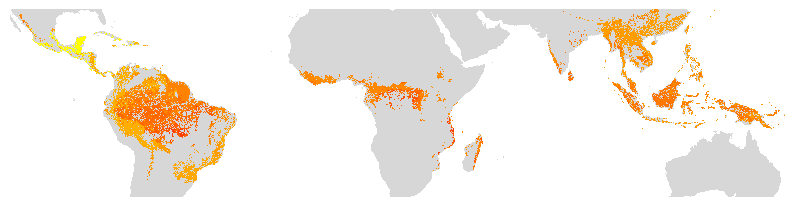

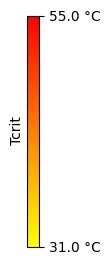

In [ ]:
Tcrit_map = rio.open(DATA_PATH + f"/outputs/Tcrit_map_min_1981_2010{version}.tif", 'r').read(1)
Tcrit_map[Tcrit_map==1000] = np.nan
Tcrit_map[Tcrit_map==0] = np.nan
skew_map_tropics = np.load(DATA_PATH + f'/outputs/species_presences_skewness_tropics{version}.npy')
Tcrit_map[np.isnan(skew_map_tropics)] = np.nan

def make_fig_(data_species, figsize=(10,5), sl=None, interpolation="none", title_fig=None, is_hansen=False, cmap_='brg',save_title=None, min_cbar=1, add_side_plots=False):
    min_cbar = np.nanmin(Tcrit_map)
    max_species = np.round(np.nanmax(Tcrit_map),2)
    min_cbar, max_species = np.round(min_cbar, 1), np.round(max_species, 1)
    fig = plt.figure(figsize=figsize)
    ax = fig.gca()
    ax.set_axis_off()
    cmap_terra = colors.ListedColormap(['white', '#D7D7D7FF'])
    img = terra[sl].squeeze()
    ax.imshow(img, cmap=cmap_terra)
    cmap_species = cmap_
    cmap_species.set_under('k', alpha=0)
    cmap_species.set_bad(alpha=0)
    d = data_species[sl].squeeze().copy()
    if is_hansen:
        d[dense_vegetation[sl].squeeze() == 0] = 0
    im = ax.imshow(d, cmap=cmap_species, interpolation=interpolation)
    im.set_clim(min_cbar, max_species)
    plt.savefig("../figures/Appendix/Tcrits/tropics.png", bbox_inches='tight')
    
    fig2 = plt.figure(figsize=(2, 3))
    ax2 = fig2.gca()
    cmap_species = cmap_
    im2 = ax2.imshow(data_species.squeeze(), cmap=cmap_species, interpolation=interpolation)
    im2.set_clim(min_cbar, max_species)
    im2.set_visible(False)
    cbar2 = fig2.colorbar(im2,
                        ticks=[min_cbar, max_species],
                        format=mticker.FixedFormatter([f'{min_cbar} °C', f'{max_species} °C']),
                        extend='neither'
                        )
    ax2.remove()
    cbar2.ax.set_ylabel('Tcrit', rotation=90, labelpad=-55, va='bottom')
    plt.savefig("../figures/Appendix/Tcrits/cbar.png", bbox_inches='tight')
Tcrit_map[~data_both_biomes] = np.nan
Tcrit_map[dense_vegetation == 0] = np.nan
from matplotlib.colors import LinearSegmentedColormap
cmap = LinearSegmentedColormap.from_list("custom_cmap", ["yellow", "red"])
make_fig_(Tcrit_map, interpolation='none', sl=sl_tropics, cmap_=cmap)


In [5]:
for key, sl in d_sl.items():
    tmap = Tcrit_map[sl]
    print(key, np.nanmean(tmap), np.nanstd(tmap))
print(np.nanmean(Tcrit_map), np.nanstd(Tcrit_map))

south_east_asia 39.86268765654865 8.488040788481285
south_america 38.41425681241784 10.898615785814723
africa 31.8901480765833 19.102912873378557
37.473689376067725 12.738208041472358


# Boxplots Tcrits

# Same code than to produce the Tcrit dataset

In [ ]:
import pandas as pd
from os.path import exists 
import shutil
import rasterio as rio
from rasterio.merge import merge
from glob import glob
from tqdm import tqdm
import numpy as np
from openpyxl import load_workbook

# T50: some of Lancaster and Feeley. Slot and Perez can also be used with T50.

# Create a function to check strikethrough for a specific cell
def is_strikethrough(cell):
    if cell.font and cell.font.strike:
        return True
    return False



list_sdms_available = pd.read_csv(DATA_PATH + '/data_species/list_species.csv')['species'].tolist()
merged_df = pd.DataFrame.from_dict({'Plant species clean': [], 'Thermal Tolerance_deg.C': []})

df_lancaster = pd.read_excel(DATA_PATH + '/data_species/pnas.1918162117.sd01.xlsx')
df_lancaster = df_lancaster[df_lancaster['Tmin or Tmax'] == 'Tmax']
df_lancaster['Tolerance measure'][(df_lancaster['Tolerance measure']=='T50')] = 'Tcrit'
df_lancaster = df_lancaster[(df_lancaster['Tolerance measure'] =='Tcrit')] # que 16 especes.
species = set([i for i in df_lancaster['Plant species clean']])
list_nature = df_lancaster['Plant species clean'].tolist()
common_list = set(list_nature).intersection(list_sdms_available)
print("Lancaster", len(common_list))
df_lancaster = df_lancaster[df_lancaster['Plant species clean'].isin(common_list)]
# merged_df = pd.concat([merged_df, df_lancaster])

df_sullivan = pd.read_excel(DATA_PATH + '/data_species/gcb13477-sup-0002-tables7.xlsx')
df_sullivan = df_sullivan.rename(columns={'Species': 'Plant species clean', 'Tcrit': 'Thermal Tolerance_deg.C'})
df_sullivan['Plant species clean'] = [i.replace(' ', '_').replace('#', '').replace('*', '') for i in df_sullivan['Plant species clean']]
df_sullivan = df_sullivan[['Plant species clean', "Thermal Tolerance_deg.C" ]]
df_sullivan['Tmin or Tmax'] = 'Tmax'
df_sullivan = df_sullivan[~df_sullivan["Thermal Tolerance_deg.C"].isna()]
df_sullivan = df_sullivan[df_sullivan["Thermal Tolerance_deg.C"] <= 55]
unique_sull = np.unique(df_sullivan['Plant species clean'])
species_sullivan = set([i for i in df_sullivan['Plant species clean']])
common_list2 = species_sullivan.intersection(list_sdms_available)
n_sullivan_species = len(common_list2)
print("Sullivan", len(common_list2))
df_sullivan = df_sullivan[df_sullivan['Plant species clean'].isin(common_list2)]
merged_df = pd.concat([merged_df, df_sullivan])

df_Middleby = pd.DataFrame.from_dict({'Plant species clean': ["Terminalia_microcarpa", "Castanospermum_australe", "Castanospermum_australe"], 'Thermal Tolerance_deg.C': [47.7, 46.6, 49.6]})
df_Middleby['Tmin or Tmax'] = 'Tmax'
species_Middleby = set([i for i in df_Middleby['Plant species clean']])
common_list = species_Middleby.intersection(list_sdms_available)
print("Middleby", len(common_list))
df_Middleby = df_Middleby[df_Middleby['Plant species clean'].isin(common_list)]
# merged_df = pd.concat([merged_df, df_Middleby])
# from: https://www.authorea.com/users/802804/articles/1187938-ecotypic-variation-in-leaf-thermoregulation-and-heat-tolerance-but-not-thermal-safety-margins-in-tropical-trees


df_Tarvainen = pd.DataFrame.from_dict({'Plant species clean': ["Harungana_montana", "Syzygium_guineense", "Entandrophragma_exselsum"], 'Thermal Tolerance_deg.C': [40, 40, 40]})
df_Tarvainen['Tmin or Tmax'] = 'Tmax'
species_Tarvainen = set([i for i in df_Tarvainen['Plant species clean']])
common_list = species_Tarvainen.intersection(list_sdms_available)
print("Tarvainen", len(common_list))
df_Tarvainen = df_Tarvainen[df_Tarvainen['Plant species clean'].isin(common_list)]
# merged_df = pd.concat([merged_df, df_Tarvainen])

# Perez & Feeley: https://onlinelibrary.wiley.com/doi/full/10.1111/jbi.13984
df_perez = pd.read_csv(DATA_PATH + "/data_species/Perez.and.Feeley.2020.csv")
df_perez = df_perez.rename(columns={'species': 'Plant species clean', 'Tcrit': 'Thermal Tolerance_deg.C'}) #T50 instead of Tcrit
df_perez['Plant species clean'] = [i.replace(' ', '_') for i in df_perez['Plant species clean']]
df_perez['Tmin or Tmax'] = 'Tmax'
species_perez = set([i for i in df_perez['Plant species clean']])
common_list = species_perez.intersection(list_sdms_available)
print("Perez", len(common_list))
n_perez_species = len(common_list)
df_perez = df_perez[df_perez['Plant species clean'].isin(common_list)]
merged_df = pd.concat([merged_df, df_perez])

# https://nph.onlinelibrary.wiley.com/doi/full/10.1111/nph.19702
df_bison = pd.read_csv("/data/gaston/ecostress/ecostress/data_species/Bison.csv")
df_bison = df_bison.rename(columns={'name': 'Plant species clean', 'Tcrit': 'Thermal Tolerance_deg.C'})
unique_bison = np.unique(df_bison['Plant species clean'])
species_bison = set([i for i in df_bison['Plant species clean']])
nspecies_bison = len(species_bison)
common_list = species_bison.intersection(list_sdms_available)
print("bison", len(common_list))
n_bison_species = len(common_list)
df_bison = df_bison[df_bison['Plant species clean'].isin(common_list)]
merged_df = pd.concat([merged_df, df_bison])

file_path = '/data/gaston/ecostress/ecostress/data_species/Table_1_Feeley.xlsx'
df_feeley = pd.read_excel(file_path, skiprows=2)
# Load the workbook with openpyxl
wb = load_workbook(file_path)
sheet = wb.active  # Get the active sheet (or use sheet names)
for row in sheet.iter_rows(min_row=4, max_row=sheet.max_row, min_col=1, max_col=sheet.max_column):
    for cell in row:
        if is_strikethrough(cell):
            df_feeley.iloc[cell.row - 4, cell.column - 1] = f"Strikethrough"
df_feeley = df_feeley[df_feeley['T50 (95% CI)'] != 'Strikethrough']
df_feeley = df_feeley[~df_feeley['Species'].isnull()]
df_feeley['T50 (95% CI)'] = [float(i.split(' ')[0]) for i in df_feeley['T50 (95% CI)']]
df_feeley = df_feeley.rename(columns={'Species': 'Plant species clean', 'T50 (95% CI)': 'Thermal Tolerance_deg.C'})
df_feeley['Plant species clean'] = [i.replace(' ', '_') for i in df_feeley['Plant species clean']]
df_feeley['Tmin or Tmax'] = 'Tmax'
species_feeley = set([i for i in df_feeley['Plant species clean']])
common_list = species_feeley.intersection(list_sdms_available)
print("Feeley", len(common_list))
n_feeley_species = len(common_list)
df_feeley = df_feeley[df_feeley['Plant species clean'].isin(common_list)]
# merged_df = pd.concat([merged_df, df_feeley])

df_slot = pd.read_excel('/data/gaston/ecostress/ecostress/data_species/Tcrit_147 tropical_forest_species.xlsx')
df_slot = df_slot.rename(columns={'Species': 'Plant species clean', 'Tcrit': 'Thermal Tolerance_deg.C'})
df_slot['Tmin or Tmax'] = 'Tmax'
df_slot['Plant species clean'] = [i.replace(' ', '_').replace('#', '').replace('*', '') for i in df_slot['Plant species clean']]
unique_slot = np.unique(df_slot['Plant species clean'])
species_slot = set([i for i in df_slot['Plant species clean']])
common_list = species_slot.intersection(list_sdms_available)
print("Slot", len(common_list))
n_slot_species = len(common_list)
df_slot = df_slot[df_slot['Plant species clean'].isin(common_list)]
merged_df = pd.concat([merged_df, df_slot])

merged_df = merged_df[merged_df["Thermal Tolerance_deg.C"] <= 55]

species_total = set([i for i in merged_df['Plant species clean']])
tot_number = len(species_total.intersection(list_sdms_available))
print(len(species_slot)+len(species_bison)+len(species_perez)+len(species_sullivan), tot_number)
print(len(species_total))
print("Total", len(set([i for i in merged_df['Plant species clean']])))

Lancaster 64
Sullivan 66
Middleby 2
Tarvainen 1
Perez 50
bison 41
Feeley 71
Slot 106
610 256
256
Total 256


/tmp/ipykernel_715782/2864943939.py:26: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_lancaster['Tolerance measure'][(df_lancaster['Tolerance measure']=='T50')] = 'Tcrit'


max 50.4 54.9583636836448 48.58 50.846 54.9583636836448
mean 46.901785714285715 46.31690154844035 42.617399999999996 46.41573170731707 45.89413226516785
min 42.0 37.41881760486856 31.05 42.606 31.05
std 1.753719625684278 3.6538256981466657 2.8133636878299253 1.915791335248742 3.0258093706504163
median 46.8 46.115428392115945 42.225 46.374 46.061


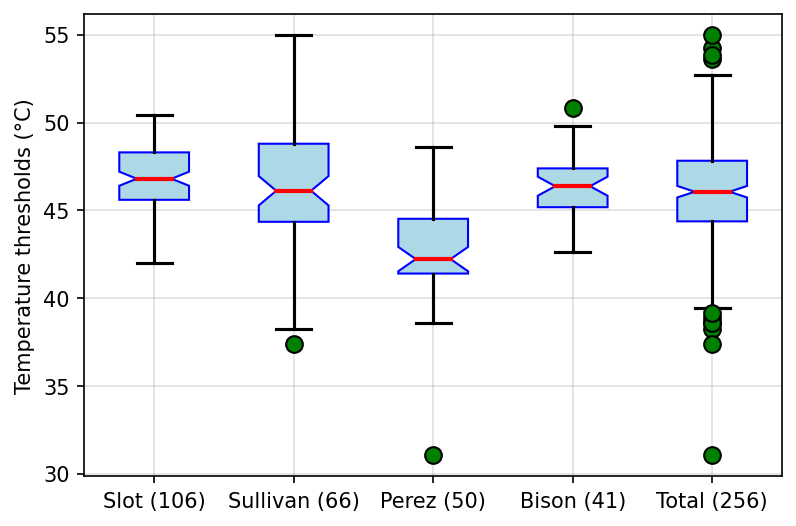

In [6]:

fig, ax = plt.subplots(figsize=(6, 4), dpi=150)

# , df_sullivan["Thermal Tolerance_deg.C"], df_lancaster["Thermal Tolerance_deg.C"]
total = np.concatenate([df_slot["Thermal Tolerance_deg.C"], df_sullivan["Thermal Tolerance_deg.C"], df_perez["Thermal Tolerance_deg.C"], df_bison["Thermal Tolerance_deg.C"]])
print("max", np.max(df_slot["Thermal Tolerance_deg.C"]), np.max(df_sullivan["Thermal Tolerance_deg.C"]), np.max(df_perez["Thermal Tolerance_deg.C"]), np.max(df_bison["Thermal Tolerance_deg.C"]), np.max(total))
print("mean", np.mean(df_slot["Thermal Tolerance_deg.C"]), np.mean(df_sullivan["Thermal Tolerance_deg.C"]), np.mean(df_perez["Thermal Tolerance_deg.C"]), np.mean(df_bison["Thermal Tolerance_deg.C"]), np.mean(total))
print("min", np.min(df_slot["Thermal Tolerance_deg.C"]), np.min(df_sullivan["Thermal Tolerance_deg.C"]), np.min(df_perez["Thermal Tolerance_deg.C"]), np.min(df_bison["Thermal Tolerance_deg.C"]), np.min(total))
print("std", np.std(df_slot["Thermal Tolerance_deg.C"]), np.std(df_sullivan["Thermal Tolerance_deg.C"]), np.std(df_perez["Thermal Tolerance_deg.C"]), np.std(df_bison["Thermal Tolerance_deg.C"]), np.std(total))
print("median", np.median(df_slot["Thermal Tolerance_deg.C"]), np.median(df_sullivan["Thermal Tolerance_deg.C"]), np.median(df_perez["Thermal Tolerance_deg.C"]), np.median(df_bison["Thermal Tolerance_deg.C"]), np.median(total))
ax.boxplot([df_slot["Thermal Tolerance_deg.C"], df_sullivan["Thermal Tolerance_deg.C"], df_perez["Thermal Tolerance_deg.C"], df_bison["Thermal Tolerance_deg.C"], merged_df["Thermal Tolerance_deg.C"]], patch_artist=True, notch=True, 
           boxprops=dict(facecolor='lightblue', color='blue'),
           medianprops=dict(color='red', linewidth=2),
           whiskerprops=dict(color='black', linewidth=1.5),
           capprops=dict(color='black', linewidth=1.5),
           flierprops=dict(marker='o', markerfacecolor='green', markersize=8, linestyle='none'),
        #    showfliers=False
           )

ax.set_xticklabels([f'Slot ({n_slot_species})', f'Sullivan ({n_sullivan_species})', f'Perez ({n_perez_species})', f'Bison ({n_bison_species})', f"Total ({tot_number})"])
ax.set_ylabel('Temperature thresholds (°C)')

plt.grid(alpha=0.4)
plt.savefig("../figures/Appendix/tcrit_distribution.png", bbox_inches='tight')